Notation: $y_{i}$ is a scalar, and $x_{i}$ is a $K\times1$ vector. $Y$
is an $n\times 1$ vector, and $X$ is an $n\times K$ matrix.

Algebra of Least Squares
========================

OLS estimator
-------------

As we have learned from the linear project model, the parameter $\beta$
$$\begin{aligned}
y_{i} & =  x'_{i}\beta+e_{i}\\
E[x_{i}e_{i}] & =  0\end{aligned}$$ can be written as
$\beta=\left(E\left[x_{i}x_{i}'\right]\right)^{-1}E\left[x_{i}y_{i}\right].$

While population is something imaginary, in reality we possess a sample
of $n$ observations. We thus replace the population mean
$E\left[\cdot\right]$ by the sample mean, and the resulting estimator is
$$\widehat{\beta}=\left(\frac{1}{n}\sum_{i=1}^{n}x_{i}x_{i}'\right)^{-1}\frac{1}{n}\sum_{i=1}^{n}x_{i}y_{i}=\left(X'X\right)^{-1}X'y.$$
This is one way to motivate the OLS estimator.

Below is an example of OLS estimation

In [1]:
import numpy as np

n = 30
b0 = np.matrix([[1.0],[0.5]])

e = np.random.normal(size = (n,1))
X = np.hstack((np.ones((n, 1)), np.random.normal(size = (n, 1))))
y = np.dot(X, b0) + e

In [2]:
import statsmodels.api as sm

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     8.695
Date:                Fri, 06 Sep 2019   Prob (F-statistic):            0.00637
Time:                        17:27:46   Log-Likelihood:                -41.614
No. Observations:                  30   AIC:                             87.23
Df Residuals:                      28   BIC:                             90.03
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8645      0.185      4.675      0.0

In [3]:
bhat = np.dot(np.linalg.inv(np.dot( X.T, X ) ), np.dot( X.T, y ) ) 
print(bhat)

[[0.86451209]
 [0.5518908 ]]


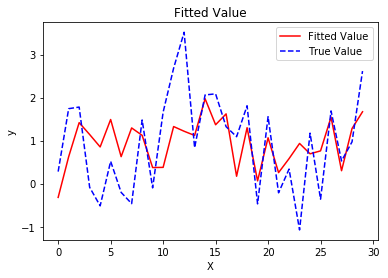

In [4]:
import matplotlib.pyplot as plt

plt.plot(results.fittedvalues, color = 'red', label = 'Fitted Value')
plt.plot(y, color = 'blue', linestyle = 'dashed', label = 'True Value')
plt.title('Fitted Value')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

Here we introduce some definitions and properties in OLS estimation.

-   Fitted value: $\widehat{Y}=X\widehat{\beta}$.

-   Projector: $P_{X}=X\left(X'X\right)^{-1}X$; Annihilator:
    $M_{X}=I_{n}-P_{X}$.

-   $P_{X}M_{X}=M_{X}P_{X}=0$.

-   If $AA=A$, we call it an idempotent matrix. Both $P_{X}$ and $M_{X}$
    are idempotent.

-   Residual:
    $\widehat{e}=Y-\widehat{Y}=Y-X\widehat{\beta}=M_{X}Y=M_{X}\left(X\beta+e\right)=M_{X}e$.

-   $X'\widehat{e}=XM_{X}e=0$.

-   $\frac{1}{n}\sum_{i=1}^{n}\widehat{e}_{i}=0$ if $x_{i}$ contains a
    constant.

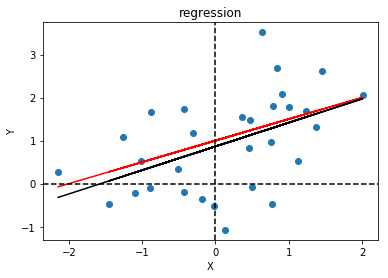

In [5]:
plt.plot(X[:, 1], y, 'o')
plt.plot(X[:, 1], np.dot(X, b0), color='red', linestyle='-')
plt.plot(X[:, 1], np.dot(X, bhat), color='black', linestyle='-')
plt.title('regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.axhline(0, color = 'black', linestyle = 'dashed')
plt.axvline(0, color = 'black', linestyle = 'dashed')
plt.show()

In [6]:
# check the orthogonality of ehat and X1
ehat = y - np.dot(X, bhat )
MX =  np.identity(n) - X @ np.linalg.inv( X.T @ X)  @ X.T
print(  np.hstack( (ehat, MX@e, MX@y) ) )
print( X.T @ ehat )

[[ 0.5998234   0.5998234   0.5998234 ]
 [ 1.11605818  1.11605818  1.11605818]
 [ 0.36184396  0.36184396  0.36184396]
 [-1.22639942 -1.22639942 -1.22639942]
 [-1.36906709 -1.36906709 -1.36906709]
 [-0.97129596 -0.97129596 -0.97129596]
 [-0.83064016 -0.83064016 -0.83064016]
 [-1.75838989 -1.75838989 -1.75838989]
 [ 0.35659873  0.35659873  0.35659873]
 [-0.47220768 -0.47220768 -0.47220768]
 [ 1.28158139  1.28158139  1.28158139]
 [ 1.35561978  1.35561978  1.35561978]
 [ 2.30043047  2.30043047  2.30043047]
 [-0.28397183 -0.28397183 -0.28397183]
 [ 0.08907289  0.08907289  0.08907289]
 [ 0.71761302  0.71761302  0.71761302]
 [-0.29643683 -0.29643683 -0.29643683]
 [ 0.91855747  0.91855747  0.91855747]
 [ 0.51029829  0.51029829  0.51029829]
 [-0.53403645 -0.53403645 -0.53403645]
 [ 0.49042632  0.49042632  0.49042632]
 [-0.46930232 -0.46930232 -0.46930232]
 [-0.2430777  -0.2430777  -0.2430777 ]
 [-2.00926866 -2.00926866 -2.00926866]
 [ 0.48003603  0.48003603  0.48003603]
 [-1.12205436 -1.12205436

In [8]:
print( np.mean(ehat) )
print( np.sum(ehat))
print( np.mean(e) )

-1.7023419710919068e-16
-5.10702591327572e-15
-0.12825709098929042


**Real Data Example**

We check the relationship between *health status* and three control variables: *the number of doctor visits*, *the number of children in the household*, and
*access to health care*. 

*The real data example in Python is to be added"


In [9]:
n = 30
b0 = np.matrix([[1.0],[0.5],[0.1],[0.5]])

e = np.random.normal(size = (n,1))
X = np.hstack((np.ones((n, 1)), np.random.normal(size = (n, 3))))
y = np.dot(X, b0) + e


X2 = X[:,0:2]
PX2 = X2 @ np.linalg.inv( X2.T @ X2) @ X2.T
MX2 = np.identity(n) - PX2

X3 = X[:,2:4]


bhat3 =  np.linalg.inv( X3.T@ MX2 @ X3 ) @ (X3.T @ MX2 @ y)
print(bhat3)

bhat =  np.linalg.inv( X.T@ X ) @ (X.T @ y)
print(bhat)

[[-0.10075886]
 [ 0.62091428]]
[[ 1.20898789]
 [ 0.20653828]
 [-0.10075886]
 [ 0.62091428]]


Heteroskedasticity

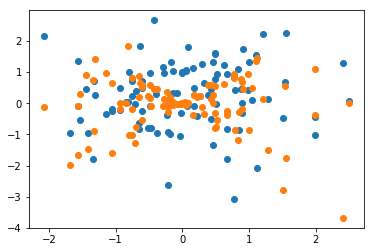

In [10]:
n = 100
x =  np.random.normal(size = (n, 1))

e1 =  np.random.normal(size = (n, 1) )
plt.plot( x, e1, 'o' )

e2 = x * np.random.normal(size = (n, 1) )
plt.plot( x, e2, 'o')